In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [47]:
df=pd.read_csv('/content/flight_dataset.csv')

In [48]:
df.drop(['Year','Date','Month'],axis=1,inplace=True)

In [49]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Price,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,45


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Dep_hours       10683 non-null  int64 
 6   Dep_min         10683 non-null  int64 
 7   Arrival_hours   10683 non-null  int64 
 8   Arrival_min     10683 non-null  int64 
 9   Duration_hours  10683 non-null  int64 
 10  Duration_min    10683 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 918.2+ KB


In [51]:
df.describe()

,Total_Stops,Price,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [52]:
df.shape

(10683, 11)

In [53]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [54]:
df.shape

(5375, 11)

In [55]:
# Print unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'Airline': ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Unique values in 'Source': ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Unique values in 'Destination': ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Unique values in 'Total_Stops': [0 2 1 3 4]

Unique values in 'Price': [ 3897  7662 13882 ...  9790 12352 12648]

Unique values in 'Dep_hours': [22  5  9 18 16  8 11 20 21 17 14  4  7 10 15  6 19 23 13  2 12  0  1  3]

Unique values in 'Dep_min': [20 50 25  5  0 55 45 40 10 15 35 30]

Unique values in 'Arrival_hours': [ 1 13  4 23 21 11 10  5 19 22  9 12  6  8  3 20 16 18 15 14  0  2  7 17]

Unique values in 'Arrival_min': [10 15 25 30 35  5  0 55 20 50 45 40]

Unique values in 'Duration_hours': [ 2  7 19  5  4 15 21 25 13 12 26 22 23 20 10  6 11  8 16  3 27  1 14  9
 18 17 24 30 28 29 37 34 38 3

In [56]:
df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')

In [58]:
from datetime import datetime, timedelta

# Function to convert 24-hour time to 12-hour time with AM/PM
def convert_to_12hr_format(hours, minutes):
    time_24hr = datetime.strptime(f"{hours}:{minutes}", "%H:%M")
    time_12hr = time_24hr.strftime("%I:%M %p")
    return time_12hr

# Combine and format departure time
df['Dep_time'] = df.apply(lambda row: convert_to_12hr_format(row['Dep_hours'], row['Dep_min']), axis=1)

# Combine and format arrival time
df['Arrival_time'] = df.apply(lambda row: convert_to_12hr_format(row['Arrival_hours'], row['Arrival_min']), axis=1)

# Function to format duration
def format_duration(hours, minutes):
    total_minutes = hours * 60 + minutes
    hours_formatted = total_minutes // 60
    minutes_formatted = total_minutes % 60
    return f"{hours_formatted}h {minutes_formatted}m"

# Combine and format flight duration
df['Flight_Duration'] = df.apply(lambda row: format_duration(row['Duration_hours'], row['Duration_min']), axis=1)

# Drop the original columns that have been combined
df.drop(columns=['Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min'], inplace=True)

In [59]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_time,Arrival_time,Flight_Duration
0,IndiGo,Banglore,Delhi,0,3897,10:20 PM,01:10 AM,2h 50m
1,Air India,Kolkata,Banglore,2,7662,05:50 AM,01:15 PM,7h 25m
2,Jet Airways,Delhi,Cochin,2,13882,09:25 AM,04:25 AM,19h 0m
3,IndiGo,Kolkata,Banglore,1,6218,06:05 PM,11:30 PM,5h 25m
4,IndiGo,Banglore,Delhi,1,13302,04:50 PM,09:35 PM,4h 45m


In [78]:
df2=df.copy()

In [76]:
stops_count = df['Total_Stops'].value_counts()

fig1 = px.bar(stops_count, x=stops_count.index, y=stops_count.values,
              labels={'x': 'Total Stops', 'y': 'Count'},
              title='Distribution of Total Stops')
fig1.show()

In [77]:
fig2 = px.box(df, x='Airline', y='Price',
              labels={'x': 'Airline', 'y': 'Price'},
              title='Price Distribution by Airline')
fig2.update_xaxes(categoryorder='total descending')  # Sort airlines by total price
fig2.show()

In [82]:
fig4 = px.scatter(df, x='Total_Stops', y='Price', color='Total_Stops',
                  labels={'x': 'Total Stops', 'y': 'Price'},
                  title='Total Stops vs. Price')
fig4.show()

In [79]:
df['Dep_time'] = pd.to_datetime(df['Dep_time'], format='%I:%M %p').dt.time
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], format='%I:%M %p').dt.time

In [80]:
fig5 = px.histogram(df, x='Dep_time',
                    labels={'x': 'Departure Time', 'y': 'Count'},
                    title='Departure Time Distribution')
fig5.update_xaxes(type='category')  # Ensure time axis is treated as categorical
fig5.show()


In [81]:
fig6 = px.histogram(df, x='Arrival_time',
                    labels={'x': 'Arrival Time', 'y': 'Count'},
                    title='Arrival Time Distribution')
fig6.update_xaxes(type='category')  # Ensure time axis is treated as categorical
fig6.show()

In [60]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
cat_cols = ['Airline', 'Source', 'Destination']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Convert Dep_time and Arrival_time to minutes since midnight (or use datetime features if needed)
df_encoded['Dep_minutes'] = pd.to_datetime(df['Dep_time'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(df['Dep_time'], format='%I:%M %p').dt.minute
df_encoded['Arrival_minutes'] = pd.to_datetime(df['Arrival_time'], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(df['Arrival_time'], format='%I:%M %p').dt.minute

# Drop original Dep_time and Arrival_time columns
df_encoded.drop(columns=['Dep_time', 'Arrival_time'], inplace=True)
# Extract hours and minutes from Flight_Duration and convert to total minutes
df_encoded['Duration_hours'] = df['Flight_Duration'].apply(lambda x: int(x.split('h')[0].strip()))
df_encoded['Duration_minutes'] = df['Flight_Duration'].apply(lambda x: int(x.split('h')[1].split('m')[0].strip()))

# Convert to total minutes
df_encoded['Total_Duration_minutes'] = df_encoded['Duration_hours'] * 60 + df_encoded['Duration_minutes']

# Drop original Flight_Duration and Duration_hours, Duration_minutes columns
df_encoded.drop(columns=['Flight_Duration', 'Duration_hours', 'Duration_minutes'], inplace=True)

# Prepare the target variable
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

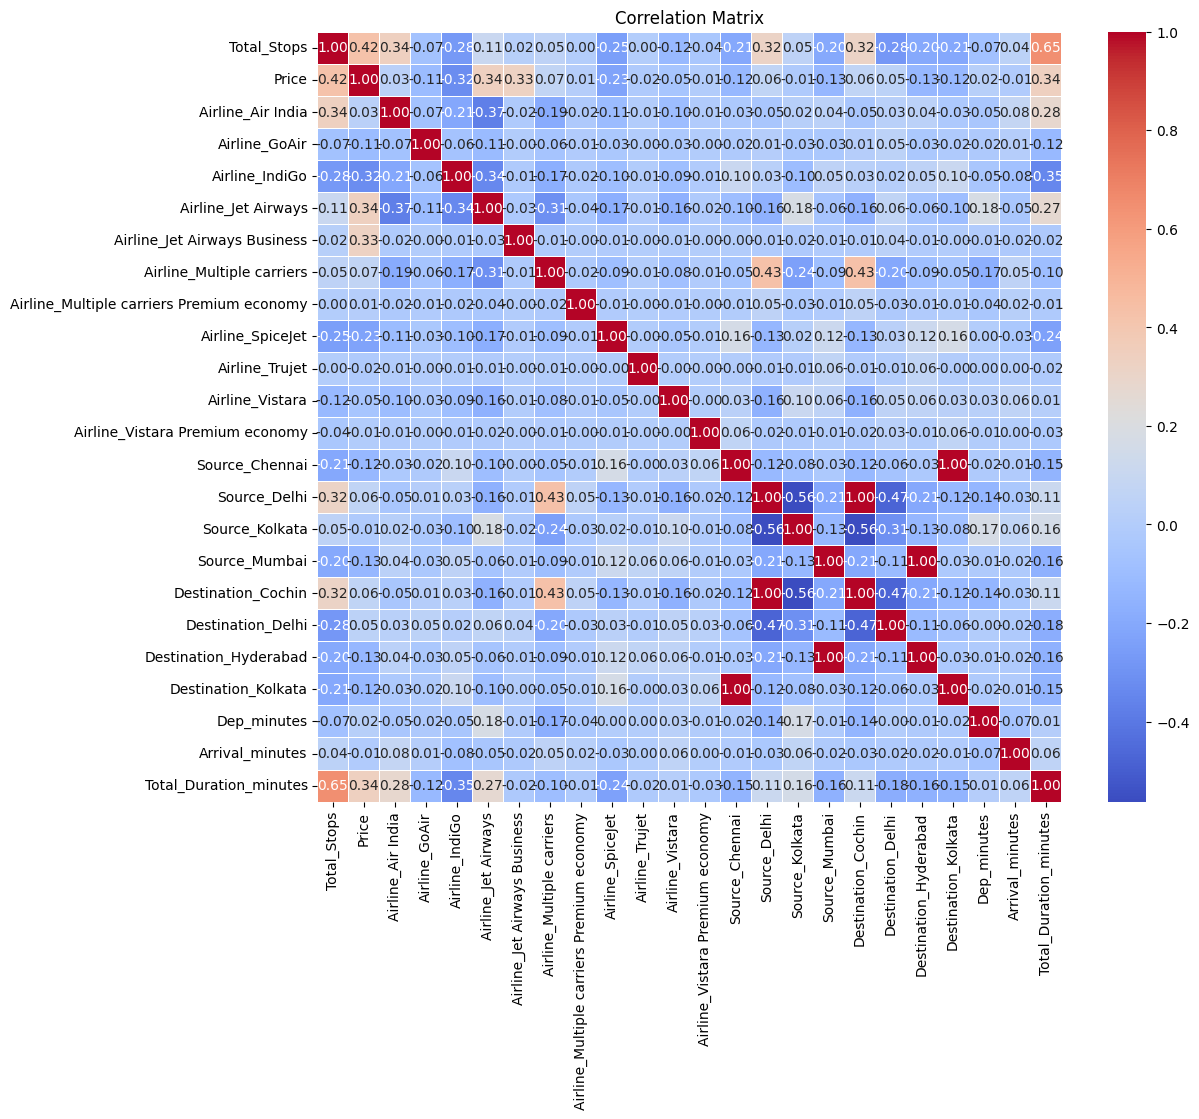

In [64]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Linear regression**

R^2 Score: 0.4381
Mean Squared Error (MSE): 11435912.66
Root Mean Squared Error (RMSE): 3381.70
Mean Absolute Percentage Error (MAPE): 27.85%


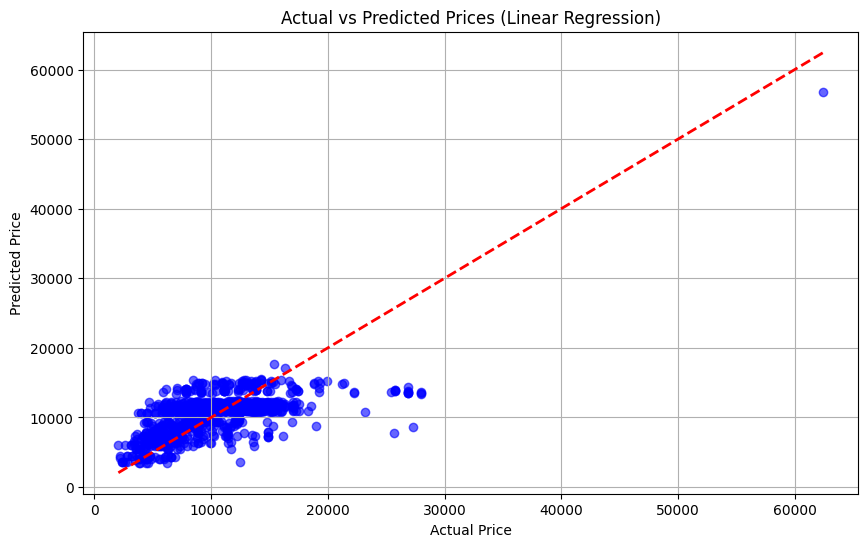

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Initialize Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

# Calculate metrics
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred) * 100

# Print metrics
print(f"R^2 Score: {r2_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

# **Random Forest**

R^2 Score (Random Forest): 0.3529
Mean Squared Error (MSE): 13169453.51
Root Mean Squared Error (RMSE): 3628.97
Mean Absolute Percentage Error (MAPE): 26.13%


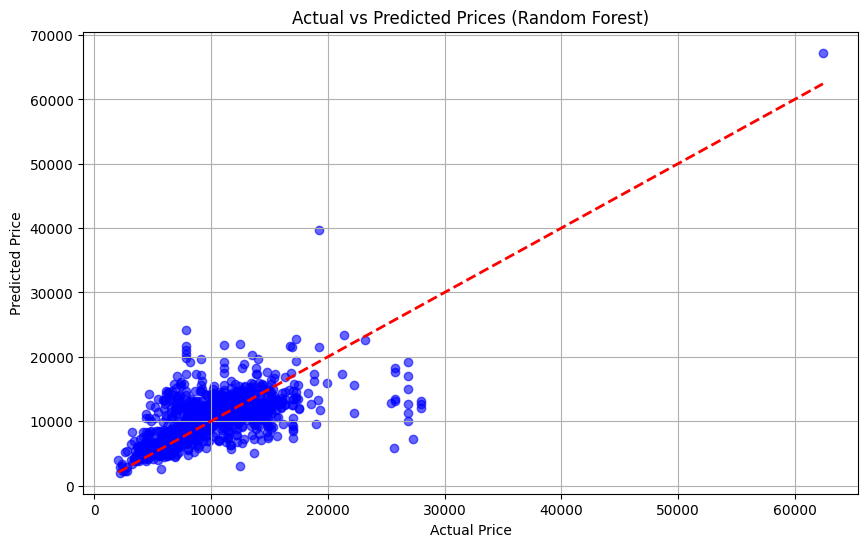

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
model_rf = RandomForestRegressor(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

# Print metrics
print(f"R^2 Score (Random Forest): {r2_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


# **XGBOOST**

R^2 Score (XGBoost): 0.3781
Mean Squared Error (MSE): 12655520.12
Root Mean Squared Error (RMSE): 3557.46
Mean Absolute Percentage Error (MAPE): 25.54%


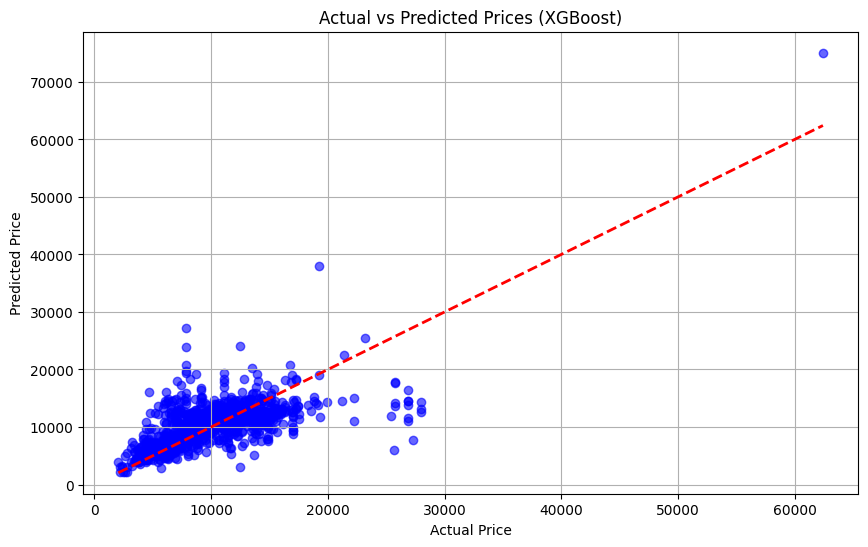

In [66]:
from xgboost import XGBRegressor

# Initialize XGBoost model
model_xgb = XGBRegressor(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Calculate metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100

# Print metrics
print(f"R^2 Score (XGBoost): {r2_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%")

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Prices (XGBoost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


# **GBM**

R^2 Score (GBM): 0.5057
Mean Squared Error (MSE): 10058281.09
Root Mean Squared Error (RMSE): 3171.48
Mean Absolute Percentage Error (MAPE): 25.36%


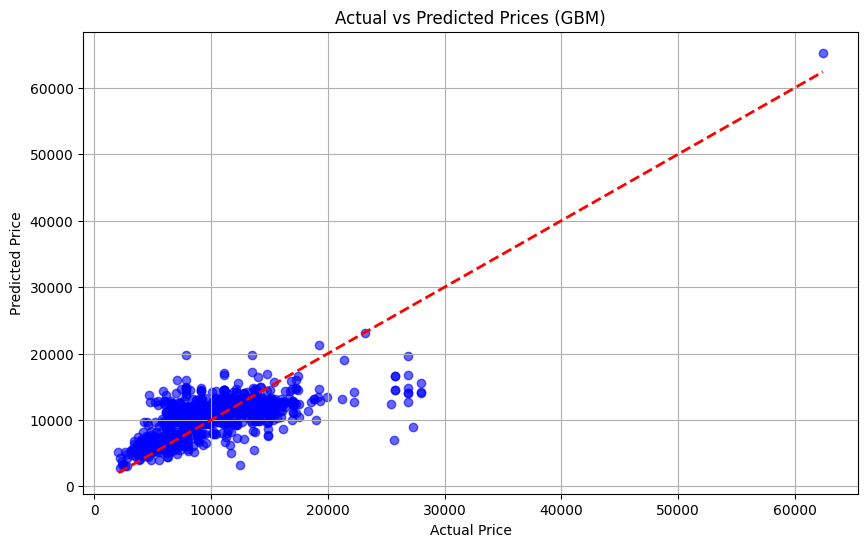

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
model_gbm = GradientBoostingRegressor(random_state=42)

# Train the model
model_gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = model_gbm.predict(X_test)

# Calculate metrics
r2_gbm = r2_score(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
mape_gbm = mean_absolute_percentage_error(y_test, y_pred_gbm) * 100

# Print metrics
print(f"R^2 Score (GBM): {r2_gbm:.4f}")
print(f"Mean Squared Error (MSE): {mse_gbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbm:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_gbm:.2f}%")

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Prices (GBM)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


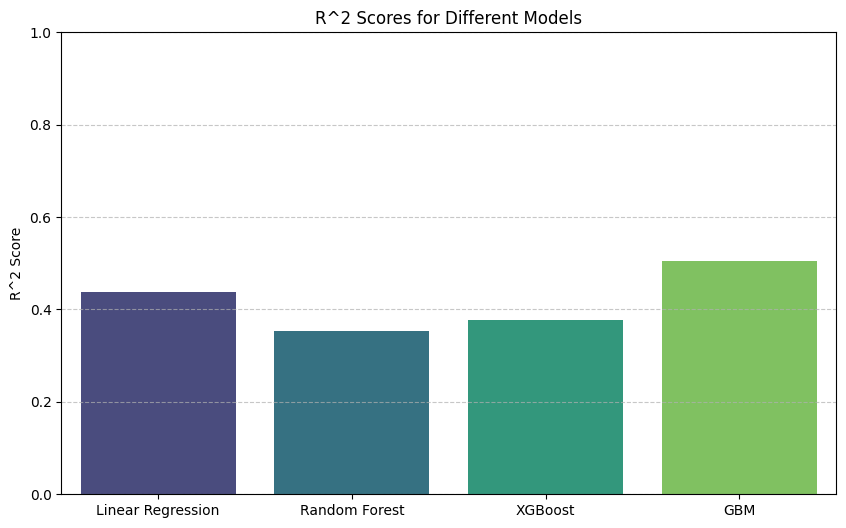

In [72]:
models = ['Linear Regression', 'Random Forest', 'XGBoost',  'GBM']
r2_scores = [r2_lr, r2_rf, r2_xgb, r2_gbm]

# Create count plot for R^2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title('R^2 Scores for Different Models')
plt.ylabel('R^2 Score')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

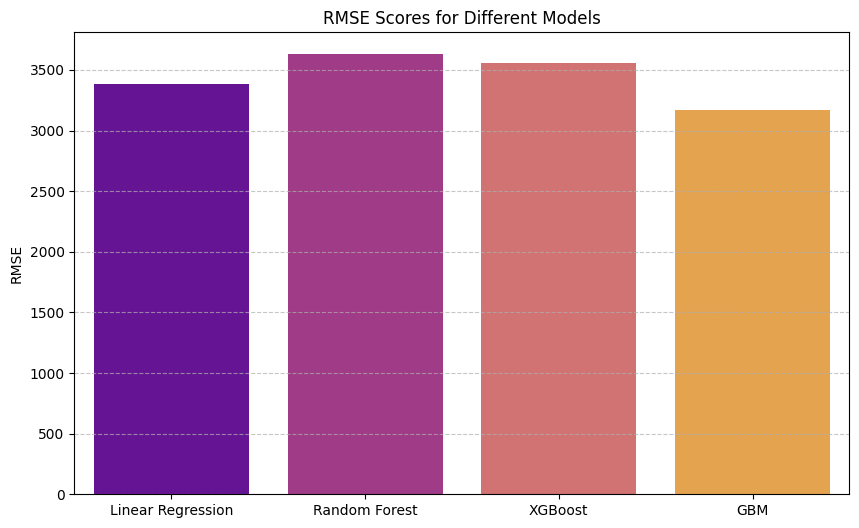

In [73]:
# Data
rmse_scores = [rmse_lr, rmse_rf, rmse_xgb,  rmse_gbm]

# Create count plot for RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_scores, palette='plasma')
plt.title('RMSE Scores for Different Models')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


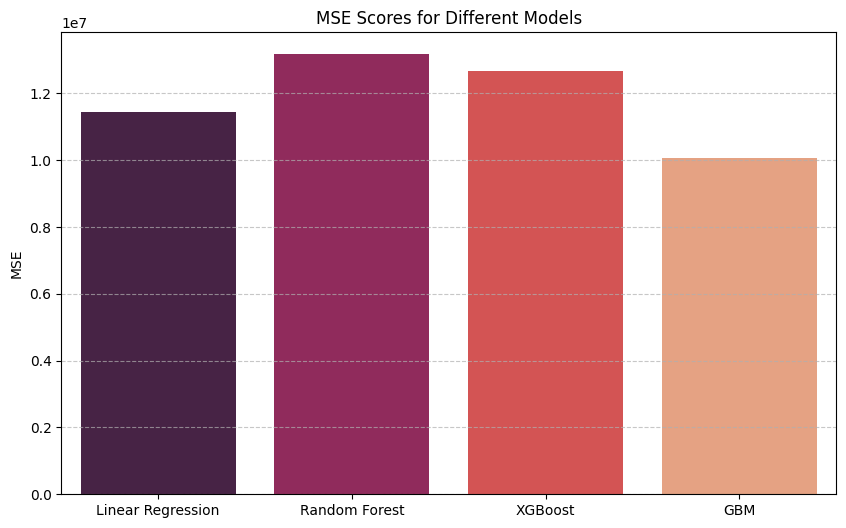

In [74]:
# Data
mse_scores = [mse_lr, mse_rf, mse_xgb, mse_gbm]

# Create count plot for MSE
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_scores, palette='rocket')
plt.title('MSE Scores for Different Models')
plt.ylabel('MSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


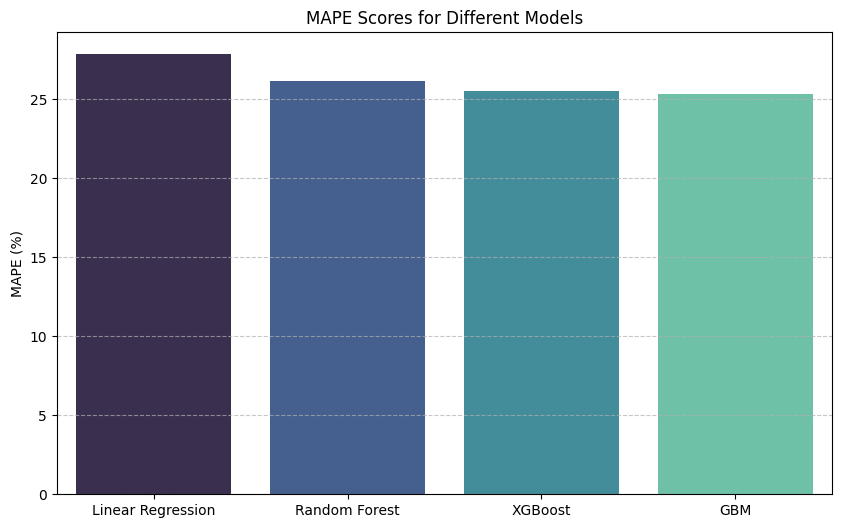

In [75]:
# Data
mape_scores = [mape_lr, mape_rf, mape_xgb, mape_gbm]

# Create count plot for MAPE
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mape_scores, palette='mako')
plt.title('MAPE Scores for Different Models')
plt.ylabel('MAPE (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
